# Instalação de dependências

In [36]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [37]:
import time
import random
from collections import deque
import heapq
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funções auxiliares

In [38]:
def manhattan(tab, objetivo):
    """Calcula a heurística de Manhattan para o 8-puzzle."""
    h = 0
    for idx, val in enumerate(tab):
        if val == 0:
            continue
        target_idx = val - 1
        cur_r, cur_c = divmod(idx, 3)
        tar_r, tar_c = divmod(target_idx, 3)
        h += abs(cur_r - tar_r) + abs(cur_c - tar_c)
    return h

def reconstruir_caminho(pai, estado):
 """Reconstrói o caminho do estado inicial ao estado dado usando o dicionário pai."""
 caminho = []
 atual = estado

 while atual is not None:
  caminho.append(list(atual))
  atual = pai[atual]
 return caminho[::-1]

def gerar_vizinhos(estado):
 """Gera estados vizinhos trocando o 0 com seus vizinhos em representação linear."""
 estado = list(estado)
 zero_index = estado.index(0)
 linha, coluna = zero_index//3, zero_index%3

 moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]
 vizinhos = []

 for mx, my in moves:
  n_linha, n_coluna = linha+mx, coluna+my
  if 0 <= n_linha < 3 and 0 <= n_coluna < 3:
   n_index = n_linha*3 + n_coluna
   novo = estado.copy()
   novo[zero_index], novo[n_index] = novo[n_index], novo[zero_index]
   vizinhos.append(tuple(novo))
 return vizinhos


# Algoritmos utilizados

In [39]:
def a_star(inicial, objetivo):
    """A* para o 8-puzzle em representação linear."""
    inicial = tuple(inicial)
    objetivo = tuple(objetivo)

    open_heap = []
    g_n = {inicial: 0}
    h_0 = manhattan(inicial, objetivo)
    heapq.heappush(open_heap, (h_0, 0, inicial))

    visitados = set()
    pai = {inicial: None}

    while open_heap:
        f, g, estado = heapq.heappop(open_heap)

        if estado in visitados:
            continue

        if estado == objetivo:
            return reconstruir_caminho(pai, estado)

        visitados.add(estado)

        for viz in gerar_vizinhos(estado):
            new_g = g + 1

            if viz in visitados:
                continue

            if new_g < g_n.get(viz, float('inf')):
                g_n[viz] = new_g
                h = manhattan(viz, objetivo)
                pai[viz] = estado
                heapq.heappush(open_heap, (new_g + h, new_g, viz))

    return None

In [40]:
def bfs_algorithm(inicial, objetivo):
 """BFS para o 8-puzzle em representação linear."""
 inicial = tuple(inicial)
 objetivo = tuple(objetivo)
 fila = deque()
 fila.append(inicial)
 visitados = set([inicial])
 pai = {inicial: None}

 while fila:
  estado = fila.popleft()

  if estado == objetivo:
   return reconstruir_caminho(pai, estado)

  for vizinho in gerar_vizinhos(estado):
   if vizinho not in visitados:
    visitados.add(vizinho)
    pai[vizinho] = estado
    fila.append(vizinho)

 return None

In [41]:
def dfs_algorithm(inicial, objetivo):
 """DFS para o 8-puzzle em representação linear."""
 inicial = tuple(inicial)
 objetivo = tuple(objetivo)

 pilha = deque()
 visitados = set([inicial])

 pilha.append(inicial)
 pai = {inicial: None}

 while pilha:
  estado = pilha.pop()

  if estado == objetivo:
   return reconstruir_caminho(pai, estado)

  for vizinho in reversed(gerar_vizinhos(estado)):
   if vizinho not in visitados:
    visitados.add(vizinho)
    pilha.append(vizinho)
    pai[vizinho] = estado

 return None

# Teste utilizado nos slides

In [42]:
objetivo = [1, 2, 3, 4, 5, 6, 7, 8, 0]

input = [[4, 3, 6, 5, 8, 0, 2, 1, 7], [1, 2, 3, 4, 5, 0, 6, 7, 8], [8, 1, 0, 5, 7, 6, 4, 3, 2]]

for i in range (3):
  inicial = input[i]

  inicio_a_star = time.time()
  caminho_a_star = a_star(inicial, objetivo)
  tempo_a_star = time.time() - inicio_a_star

  inicio_bfs = time.time()
  caminho_bfs = bfs_algorithm(inicial, objetivo)
  tempo_bfs = time.time() - inicio_bfs

  inicio_dfs = time.time()
  caminho_dfs = dfs_algorithm(inicial, objetivo)
  tempo_dfs = time.time() - inicio_dfs
  print(f"Input: {inicial}")
  print(f'Solução encontrada em {len(caminho_a_star)-1} movimentos')
  print(f"Tempo: {tempo_a_star:.3f}\n")

  print(f'Solução encontrada em {len(caminho_bfs)-1} movimentos')
  print(f"Tempo: {tempo_bfs:.3f}\n")

  print(f'Solução encontrada em {len(caminho_dfs)-1} movimentos')
  print(f"Tempo: {tempo_dfs:.3f}\n")

Input: [4, 3, 6, 5, 8, 0, 2, 1, 7]
Solução encontrada em 17 movimentos
Tempo: 0.001

Solução encontrada em 17 movimentos
Tempo: 0.062

Solução encontrada em 65861 movimentos
Tempo: 0.543

Input: [1, 2, 3, 4, 5, 0, 6, 7, 8]
Solução encontrada em 13 movimentos
Tempo: 0.001

Solução encontrada em 13 movimentos
Tempo: 0.008

Solução encontrada em 38811 movimentos
Tempo: 0.251

Input: [8, 1, 0, 5, 7, 6, 4, 3, 2]
Solução encontrada em 24 movimentos
Tempo: 0.037

Solução encontrada em 24 movimentos
Tempo: 0.446

Solução encontrada em 1010 movimentos
Tempo: 0.009



# Funções para garantir solução no tabuleiro

In [43]:
def eh_resolvivel(tab):
  shuffled_list = [x for x in tab if x != 0] # adiciona todos os elementos com exeção do 0
  inversoes = 0

  for i in range(0, len(shuffled_list)):
    for j in range(i+1, len(shuffled_list)):
      if shuffled_list[i] > shuffled_list[j]:
        inversoes += 1

  return inversoes % 2 == 0

In [44]:
def shuffle_tabuleiro():
  novo = objetivo[:]
  while True:
    random.shuffle(novo)
    if eh_resolvivel(novo):
      return novo[:]

# Criando dataset com n inputs para analisar o desempenho médio de cada algoritmo

In [45]:
objetivo = [1, 2, 3, 4, 5, 6, 7, 8, 0]

inputs = []
n = 100 # pode alterar
for i in range(n):
  inputs.append(shuffle_tabuleiro())

Pode demorar um pouco (cerca de 1 min)

In [46]:
mov_a_star = 0 # soma dos movimentos
mov_bfs = 0 # ...
mov_dfs = 0 # ...

time_a_star = 0 # soma dos tempos
time_bfs = 0 # ...
time_dfs = 0 # ...

for i in range(n):
  inicial = inputs[i]

  inicio_a_star = time.time()
  caminho_a_star = a_star(inicial, objetivo)
  time_a_star += (time.time() - inicio_a_star)

  inicio_bfs = time.time()
  caminho_bfs = bfs_algorithm(inicial, objetivo)
  time_bfs += (time.time() - inicio_bfs)

  inicio_dfs = time.time()
  caminho_dfs = dfs_algorithm(inicial, objetivo)
  time_dfs += (time.time() - inicio_dfs)

  mov_a_star += (len(caminho_a_star)-1)

  mov_bfs += (len(caminho_bfs)-1)

  mov_dfs += (len(caminho_dfs)-1)

In [47]:
algorithms = ['A*', 'BFS', 'DFS']
average_moves = [mov_a_star / n, mov_bfs / n, mov_dfs / n]
average_time = [time_a_star / n, time_bfs / n, time_dfs / n]

metrics_data = {
    'Algorithm': algorithms,
    'Average Moves': average_moves,
    'Average Time (s)': average_time
}

df_metrics = pd.DataFrame(metrics_data)
print("DataFrame with algorithm metrics:")
print(df_metrics)

DataFrame with algorithm metrics:
  Algorithm  Average Moves  Average Time (s)
0        A*          21.83          0.018440
1       BFS          21.83          0.328494
2       DFS       41353.63          0.345628


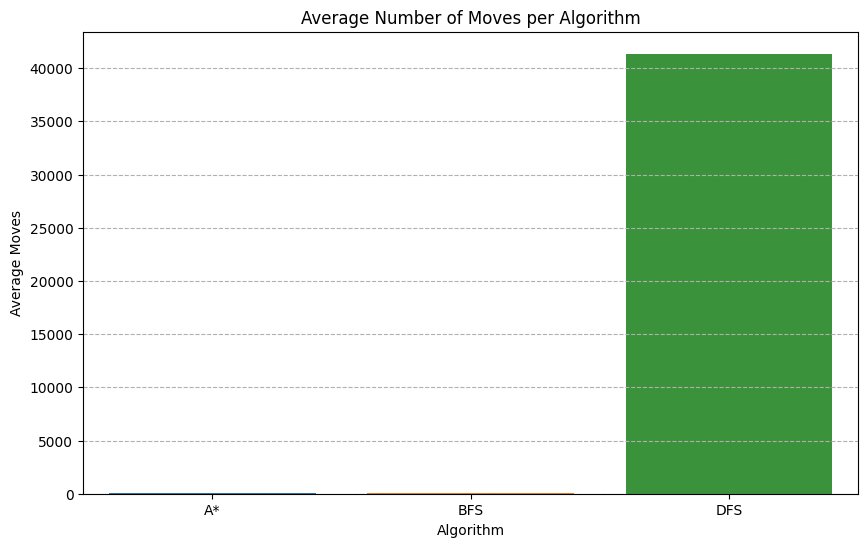

In [48]:
# Cria um gráfico da média de movimentos para cada algoritmo
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Average Moves', data=df_metrics, hue='Algorithm', legend=False)
plt.title('Average Number of Moves per Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Average Moves')
plt.grid(axis='y', linestyle='--')
plt.show()

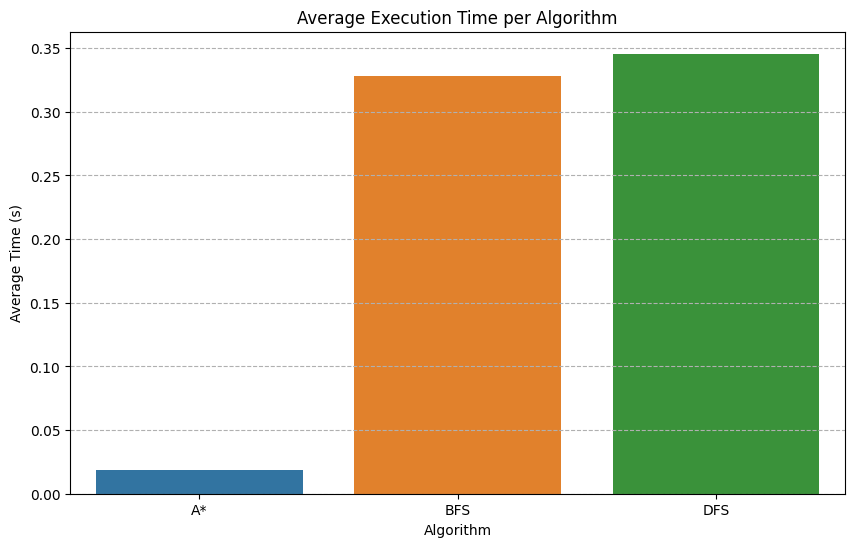

In [49]:
# Cria um gráfico da média de tempo para cada algoritmo
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Average Time (s)', data=df_metrics, hue='Algorithm', legend=False)
plt.title('Average Execution Time per Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Average Time (s)')
plt.grid(axis='y', linestyle='--')
plt.show()

# Conclusões



Através desses gráficos sobre o desempenho médio de cada algoritmo, podemos notar alguns pontos como:


*   O A* e o BFS, por **garantirem o ótimo global**, possuem o **mesmo** número médio de movimentos.

*   O DFS acaba **explodindo exponencialmente**, tornando-o impraticável para animar sua movimentação por exemplo.

*   Apesar do A* e BFS serem **semelhantes** no número de movimentos, o A* foi o melhor na questão do **tempo**.

*   De modo geral o A* foi o algoritmo **mais eficiente**, muito disso relacionado a sua complexidade e utilização de uma **heurística** muito comum, a **distância Manhattan**. O BFS vem logo depois, perdendo somente no quesito tempo, por ser um **algoritmo mais simples**. E, por fim, o DFS **não mostrou** uma boa solução para o jogo, já que o objetivo principal é resolver no **menor** número de movimentos possível, o que **não é garantido** (um ótimo global) por sua **arquitetura**.

